In [1]:
#install.packages("remotes")
#remotes::install_github("jbisanz/qiime2R")
#https://github.com/jbisanz/qiime2R


The downloaded binary packages are in
	/var/folders/d2/qqsv2qxd5fjf4k455pzytwgh0000gn/T//Rtmpce0Lzp/downloaded_packages


Hmisc        (4.2-0   -> 4.3-0  ) [CRAN]
yaml         (2.2.0   -> 2.2.1  ) [CRAN]
plyr         (1.8.4   -> 1.8.5  ) [CRAN]
jsonlite     (1.6     -> 1.6.1  ) [CRAN]
data.table   (1.12.6  -> 1.12.8 ) [CRAN]
igraph       (1.2.4.1 -> 1.2.4.2) [CRAN]
scales       (1.0.0   -> 1.1.0  ) [CRAN]
latticeExtra (0.6-28  -> 0.6-29 ) [CRAN]
htmlTable    (1.13.2  -> 1.13.3 ) [CRAN]
digest       (0.6.22  -> 0.6.23 ) [CRAN]
rlang        (0.4.1   -> 0.4.4  ) [CRAN]
farver       (NA      -> 2.0.3  ) [CRAN]
R6           (2.4.0   -> 2.4.1  ) [CRAN]
cli          (1.1.0   -> 2.0.1  ) [CRAN]
fansi        (0.4.0   -> 0.4.1  ) [CRAN]
pillar       (1.4.2   -> 1.4.3  ) [CRAN]
vctrs        (0.2.0   -> 0.2.2  ) [CRAN]
stringi      (1.4.3   -> 1.4.5  ) [CRAN]
png          (NA      -> 0.1-7  ) [CRAN]
jpeg         (NA      -> 0.1-8.1) [CRAN]
knitr        (1.25    -> 1.27   ) [CRAN]
xfun         (0.10    -> 0.12   ) [CRAN]
mime         (0.7     -> 0.8    ) [CRAN]


Installing 23 packages: Hmisc, yaml, plyr, jsonlite, data.table, igraph, scales, latticeExtra, htmlTable, digest, rlang, farver, R6, cli, fansi, pillar, vctrs, stringi, png, jpeg, knitr, xfun, mime



  There is a binary version available but the source version is later:
         binary source needs_compilation
jsonlite    1.6  1.6.1              TRUE


The downloaded binary packages are in
	/var/folders/d2/qqsv2qxd5fjf4k455pzytwgh0000gn/T//Rtmpce0Lzp/downloaded_packages


installing the source package ‘jsonlite’



✔  checking for file ‘/private/var/folders/d2/qqsv2qxd5fjf4k455pzytwgh0000gn/T/Rtmpce0Lzp/remotes4c917427943b/jbisanz-qiime2R-9f5675c/DESCRIPTION’
─  preparing ‘qiime2R’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘qiime2R_0.99.13.tar.gz’
   


In [8]:
#library(qiime2R)

In [10]:
#data = read_qza("../data/qiime2_output/table16S.qza")
#otutab = data$data
#write.csv(otutab,"../data/R_output/otutab.csv")

In [123]:
library(phyloseq)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [7]:
# Bring in OTU table
df = as.matrix(read.csv("../data/R_output/otutab.csv",row.names=1))
# Turn into phyloseq format
otutab = otu_table(df,taxa_are_rows=TRUE)

In [15]:
# Bring in sample data
samdat = read.csv("../data/metadata/Neurath_Minerals_16S_Metadata.txt",sep="\t",row.names=1)
# Turn into phyloseq format
samdat = sample_data(samdat)

In [14]:
# Create phyloseq object
ps = phyloseq(otutab,samdat)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7515 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 5 sample variables ]

In [132]:
# Two samples didn't sequence well at all
df = data.frame(sample_sums(ps))
colnames(df)="Abundance"
df$Sample = row.names(df)
head(arrange(df,Abundance))
# We'll remove them
ps.pruned = subset_samples(physeq = ps,sample_sums(ps)>10000)
ps.pruned

Abundance,Sample
<dbl>,<chr>
27,boxb32
36,boxb30
19522,boxb21
31655,boxb06
33205,boxb28
35604,boxb27


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7515 taxa and 34 samples ]
sample_data() Sample Data:       [ 34 samples by 5 sample variables ]

In [134]:
# Transform to relative abundances
ps.pruned.relabund = transform_sample_counts(physeq = ps.pruned, function(x) x / sum(x))
head(otu_table(ps.pruned.relabund))
head(sample_sums(ps.pruned.relabund))

,boxb01,boxb02,boxb03,boxb04,boxb05,boxb06,boxb07,boxb08,boxb09,boxb10,⋯,boxb25,boxb26,boxb27,boxb28,boxb29,boxb31,boxb33,boxb34,boxb35,boxb36
e9df4a364f707dbc43e29241a9cd7a88,0,0.0000000000,0,0.000000e+00,0,0.0000000000,0.000000000,0.000000e+00,0.00000000,0.0000000,⋯,0.000000e+00,0.0000000000,0.0000000000,0.0000000000,0,0.0000000,0,0.000000e+00,0.000000000,0.0000000000
a13d58bee112b2678e11b425b4b7c740,0,0.0000000000,0,4.114380e-05,0,0.0000000000,0.000000000,1.117352e-04,0.00000000,0.0000000,⋯,6.978854e-05,0.0004013315,0.0001685204,0.0002108116,0,0.6237788,0,2.933928e-04,0.013033249,0.0002300009
107227bcbe1a419cda83c0f70b070c10,0,0.0000000000,0,0.000000e+00,0,0.0000000000,0.000000000,0.000000e+00,0.00000000,0.0000000,⋯,0.000000e+00,0.0000000000,0.0000000000,0.0000000000,0,0.0000000,0,4.694285e-05,0.000000000,0.0000000000
ebff881bb0fa02037965489644291bd1,0,0.0000000000,0,9.600219e-05,0,0.0000000000,0.000000000,5.078875e-05,0.00000000,0.0000000,⋯,1.116617e-04,0.0003541160,0.0001404337,0.0000000000,0,0.3203068,0,2.229785e-04,0.009368949,0.0001642863
75d1390a8684143e7df9f1e6f32c2681,0,0.0000000000,0,0.000000e+00,0,0.0000000000,0.000000000,0.000000e+00,0.00000000,0.0000000,⋯,0.000000e+00,0.0000000000,0.0000000000,0.0000000000,0,0.0000000,0,0.000000e+00,0.000000000,0.0000000000
4c69cc5257ff31c34176de0c4e925173,0,0.0005025126,0,0.000000e+00,0,0.0003474964,0.002767888,2.072283e-01,0.00423087,0.2751142,⋯,0.000000e+00,0.0000000000,0.0000000000,0.0000000000,0,0.0000000,0,0.000000e+00,0.000000000,0.0000000000


boxb01 boxb02 boxb03 boxb04 boxb05 boxb06 
     1      1      1      1      1      1

In [135]:
# Get rid of samples we're not interested in
ps.pruned.relabund.samples = subset_samples(ps.pruned.relabund,!is.na(sample_data(ps.pruned.relabund)$Microcsom))
ps.pruned.relabund.samples = prune_taxa(taxa_sums(ps.pruned.relabund.samples)>0, ps.pruned.relabund.samples)

In [136]:
ps.pruned.relabund.samples

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7176 taxa and 31 samples ]
sample_data() Sample Data:       [ 31 samples by 5 sample variables ]

In [139]:
ord.nmds = ordinate(ps.pruned.relabund.samples,method = "NMDS",distance="bray")
ord.pcoa = ordinate(ps.pruned.relabund.samples,method = "PCoA",distance="bray")

Run 0 stress 8.720135e-05 
Run 1 stress 9.251782e-05 
... Procrustes: rmse 3.352025e-05  max resid 6.495208e-05 
... Similar to previous best
Run 2 stress 9.270954e-05 
... Procrustes: rmse 3.15738e-05  max resid 8.687649e-05 
... Similar to previous best
Run 3 stress 9.755314e-05 
... Procrustes: rmse 4.373239e-05  max resid 8.896793e-05 
... Similar to previous best
Run 4 stress 9.527769e-05 
... Procrustes: rmse 2.966889e-05  max resid 7.209339e-05 
... Similar to previous best
Run 5 stress 9.526702e-05 
... Procrustes: rmse 3.568022e-05  max resid 0.0001179755 
... Similar to previous best
Run 6 stress 9.832218e-05 
... Procrustes: rmse 1.789459e-05  max resid 5.451354e-05 
... Similar to previous best
Run 7 stress 9.772928e-05 
... Procrustes: rmse 3.617871e-05  max resid 0.0001173176 
... Similar to previous best
Run 8 stress 8.975755e-05 
... Procrustes: rmse 4.087284e-05  max resid 0.0001196068 
... Similar to previous best
Run 9 stress 9.394195e-05 
... Procrustes: rmse 3.0840

Warning message in metaMDS(veganifyOTU(physeq), distance, ...):
“stress is (nearly) zero: you may have insufficient data”

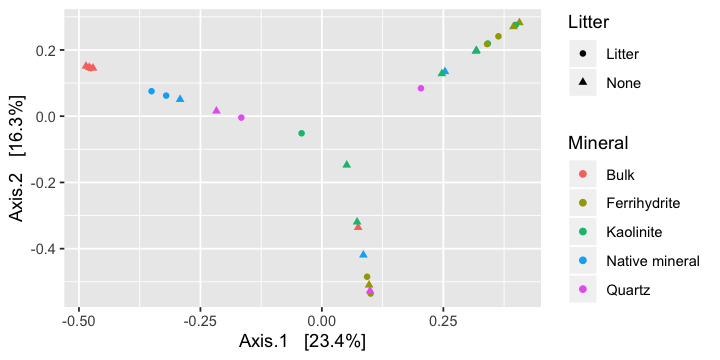

In [140]:
p = plot_ordination(physeq = ps.pruned.relabund.samples,ordination=ord.pcoa,type="samples",color="Mineral",shape="Litter")
p
# Samples really really strongly cluster into three groups...
# Something must be causing this... not immediately clear what it is
# Possibly could be some contamination issue that dominates the community...
# There must be some discriminant taxa that are totally dominating the signal.
# Once we have taxonomic info we'll be able to say better

In [141]:
mdf = psmelt(ps.pruned.relabund.samples)

In [146]:
MaxTaxon = mdf %>%
    group_by(Sample,Mineral,Litter)%>%
    summarize(MaxTaxon=max(Abundance))%>%
    arrange(Sample)
MaxTaxon
# There are a few samples where the bulk of the community is made up by one taxon
# Then several where it hits ~20%
# Decreasing to 5-10
# And for bulk it is lowest - a few percent.

Sample,Mineral,Litter,MaxTaxon
<chr>,<fct>,<fct>,<dbl>
boxb01,Bulk,None,0.02738647
boxb02,Bulk,Litter,0.02903649
boxb03,Bulk,None,0.02163123
boxb04,Bulk,Litter,0.02332853
boxb05,Bulk,None,0.02270227
boxb06,Bulk,Litter,0.03841415
boxb07,Quartz,Litter,0.35583817
boxb08,Native mineral,Litter,0.20722825
boxb09,Quartz,None,0.24192317


In [153]:
sample_data(ps.pruned.relabund.samples)$MaxTaxon = MaxTaxon$MaxTaxon
sample_data(ps.pruned.relabund.samples)$LogMaxTaxon = log(sample_data(ps.pruned.relabund.samples)$MaxTaxon)

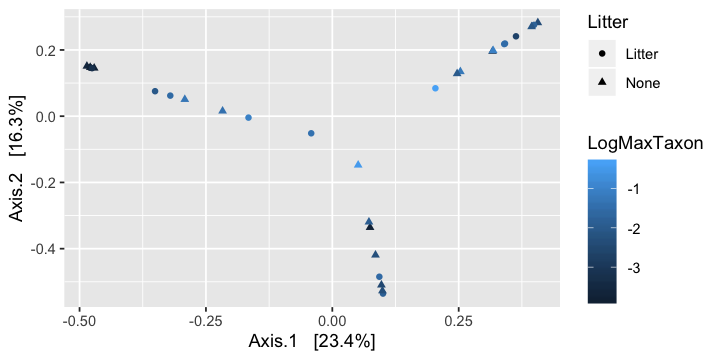

In [161]:
p = plot_ordination(physeq = ps.pruned.relabund.samples,ordination=ord.pcoa,type="samples",color="LogMaxTaxon",shape="Litter")
p
# Not totally clear how much this might be driving it
# Will have to dig into phylogeny once we've got the final data.
# It's weird, somewhat, because there is so much sequence data... so, like, not clear there's an error.
# I can see, blasting a few sequences, we have lots that are chloroplasts or mitochondria
# Let's see, once those are gone.

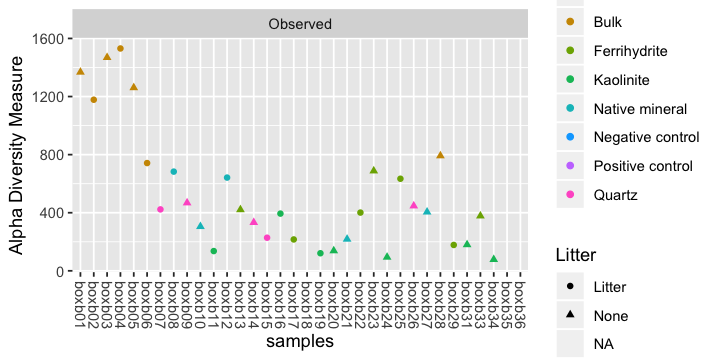

In [111]:
options(repr.plot.width=6, repr.plot.height=3)
plot_richness(physeq = ps.pruned,measures = "Observed",color="Mineral",shape="Litter")

In [86]:
ps.quartz = subset_samples(ps.pruned.relabund.samples,sample_data(ps.pruned.relabund.samples)$Mineral=="Bulk")
ps.quartz = prune_taxa(taxa_sums(ps.quartz)>0, ps.quartz)

In [87]:
ps.quartz

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3429 taxa and 7 samples ]
sample_data() Sample Data:       [ 7 samples by 5 sample variables ]

In [99]:
sample_data(ps.quartz)

,Barcode,Mineral,Microcsom,Litter,DNA_ng_uL
,<fct>,<fct>,<int>,<fct>,<dbl>
boxb01,TGTCCGTGGATC,Bulk,1,None,15
boxb02,AATACAGACCTG,Bulk,2,Litter,15
boxb03,CACGAGCTACTC,Bulk,3,None,15
boxb04,TCCAGGGCTATA,Bulk,4,Litter,15
boxb05,GCATGCATCCCA,Bulk,5,None,NA
boxb06,GCCTGCAGTACT,Bulk,6,Litter,NA
boxb28,GAAACTCCTAGA,Bulk,5,None,24


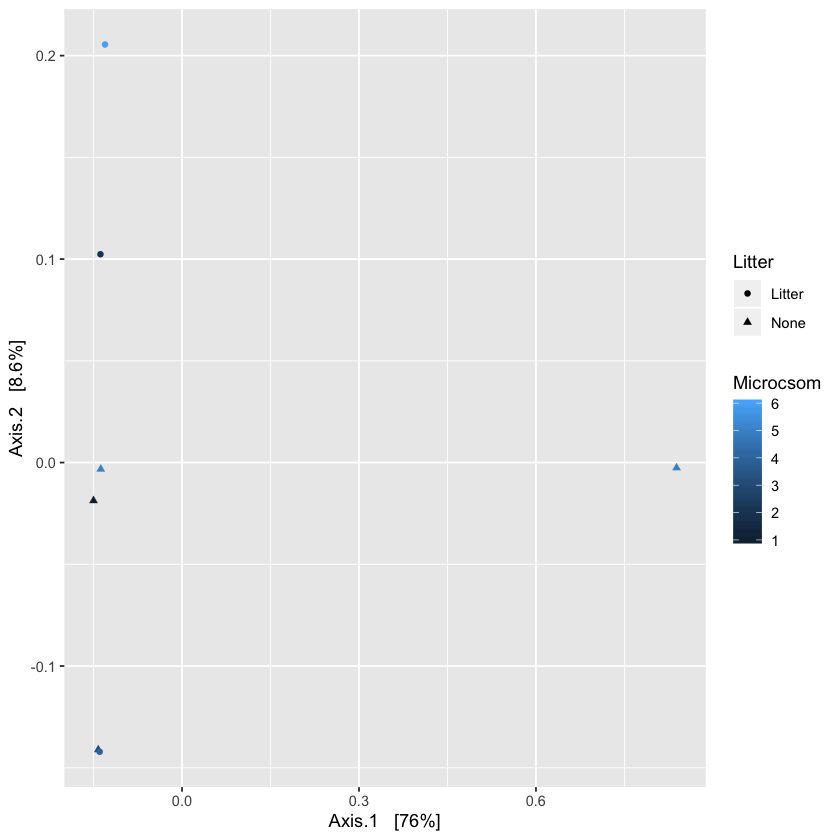

In [89]:
ord = ordinate(ps.quartz,method = "PCoA",distance="bray")
p = plot_ordination(physeq = ps.quartz,ordination=ord,type="samples",color="Microcsom",shape="Litter")
p